<a href="https://colab.research.google.com/github/marsavil/Telecom_X_Challenge_Part_2/blob/main/TelecomX_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

In [256]:
url = 'https://raw.githubusercontent.com/marsavil/telecom_x_challenge/refs/heads/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,NumServiciosAdicionales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1


#🛠️ Preparación de los Datos

In [257]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [258]:
datos['account_Charges.Total'] = datos['account_Charges.Total'].fillna(0) # manejo de valores nan para usuarios nuevos, a los cuales no se les ha facturado aún

In [259]:
datos = datos[datos['Churn'].notna()] # Se eliminan los registros donde el churn es nulo

### Eliminación de Columnas Irrelevantes

In [260]:
datos = datos.drop(columns=['customerID', 'NumServiciosAdicionales' ])
datos.head(2)

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


### Encoding

In [261]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [262]:
columns = datos.columns
columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

In [263]:
one_hot = make_column_transformer(
                                  (OneHotEncoder(drop='if_binary'),
                                  ['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService',  'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',   ]),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False
)

In [264]:
datos_encoded = one_hot.fit_transform(datos)
datos_encoded

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        6.56000e+01, 5.93300e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        5.99000e+01, 5.42400e+02],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        7.39000e+01, 2.80850e+02],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        5.03000e+01, 9.27500e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 6.70000e+01,
        6.78500e+01, 4.62765e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 6.30000e+01,
        5.90000e+01, 3.70760e+03]])

In [265]:
df_encoded = pd.DataFrame(datos_encoded, columns=one_hot.get_feature_names_out(columns))
df_encoded.columns

Index(['onehotencoder__Churn_Yes', 'onehotencoder__customer_gender_Male',
       'onehotencoder__customer_SeniorCitizen_1',
       'onehotencoder__customer_Partner_Yes',
       'onehotencoder__customer_Dependents_Yes',
       'onehotencoder__phone_PhoneService_Yes',
       'onehotencoder__phone_MultipleLines_No',
       'onehotencoder__phone_MultipleLines_No phone service',
       'onehotencoder__phone_MultipleLines_Yes',
       'onehotencoder__internet_InternetService_DSL',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__internet_InternetService_No',
       'onehotencoder__internet_OnlineSecurity_No',
       'onehotencoder__internet_OnlineSecurity_No internet service',
       'onehotencoder__internet_OnlineSecurity_Yes',
       'onehotencoder__internet_OnlineBackup_No',
       'onehotencoder__internet_OnlineBackup_No internet service',
       'onehotencoder__internet_OnlineBackup_Yes',
       'onehotencoder__internet_DeviceProtection_No',
       'o

### Verificación de la Proporción de Cancelación (Churn)

In [266]:
datos.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


### Balanceo de Clases

#### Creación y evaluación del modelo

In [267]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=[ 'onehotencoder__Churn_Yes'])
y = df_encoded['onehotencoder__Churn_Yes']

X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, stratify=y_rest, random_state=42)

##### Decision Tree

In [268]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es {modelo_tree.score(X_train, y_train):.2f}')
print(f'La exactitud del modelo con el conjunto de validación es {modelo_tree.score(X_val, y_val):.2f}')

La exactitud del modelo con el conjunto de entrenamiento es 1.00
La exactitud del modelo con el conjunto de validación es 0.74


In [269]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [270]:
y_predict = modelo_tree.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_predict)
matriz_confusion

array([[921, 179],
       [214, 183]])

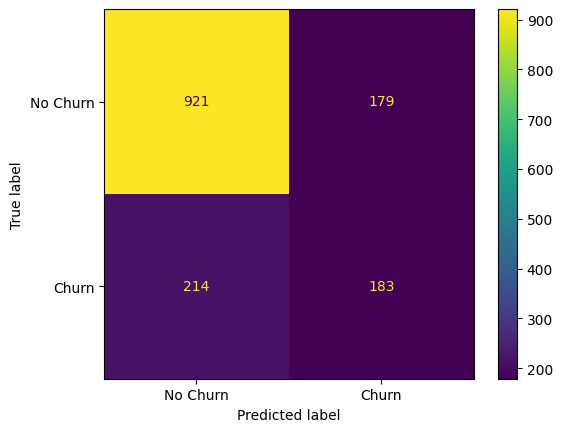

In [271]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No Churn', 'Churn'])
visualizacion.plot();

In [272]:
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

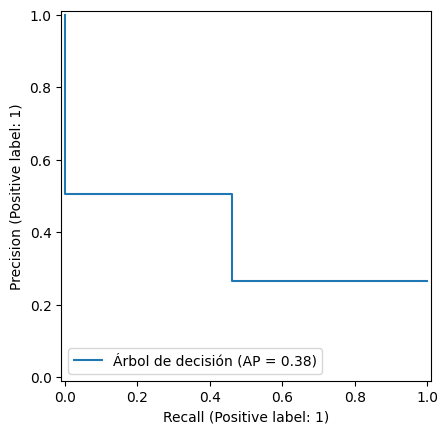

In [273]:
PrecisionRecallDisplay.from_predictions(y_val, y_predict, name ='Árbol de decisión');

In [274]:
print(f' El score promedio de precision vs recall es {average_precision_score(y_val,y_predict):.2f} ')

 El score promedio de precision vs recall es 0.38 


In [275]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      1100
         1.0       0.51      0.46      0.48       397

    accuracy                           0.74      1497
   macro avg       0.66      0.65      0.65      1497
weighted avg       0.73      0.74      0.73      1497



###### Prueba de balance

In [276]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbPipeline

In [277]:
oversampling = SMOTE()

In [278]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, cross_validate

In [279]:
def intervalo_de_confianza(resultados, nombre_modelo):
    promedio = resultados.mean()
    desvio_std = resultados.std()
    return f'El intervalo de confianza del modelo "{nombre_modelo}" es: [{promedio-2*desvio_std}, {min (promedio+2*desvio_std,1)}]'


###### Oversampling

In [280]:
modelo_tree = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('oversampling', SMOTE()), ('arbol', modelo_tree)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado Tree")

'El intervalo de confianza del modelo "Modelo Balanceado Tree" es: [0.47966996597500094, 0.6802789953302134]'

###### Undersampling

In [281]:
modelo_tree = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo_tree)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado")

'El intervalo de confianza del modelo "Modelo Balanceado" es: [0.5662117391139967, 0.7564273628343623]'

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85       777
         1.0       0.57      0.81      0.67       280

    accuracy                           0.79      1057
   macro avg       0.75      0.80      0.76      1057
weighted avg       0.83      0.79      0.80      1057



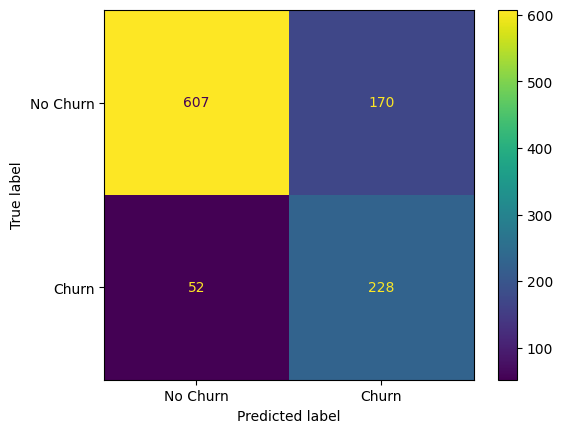

In [282]:
undersample = NearMiss (version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

modelo_tree = DecisionTreeClassifier(max_depth=10)
modelo_tree.fit(x_balanceada, y_balanceada)

y_previsto = modelo_tree.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions (y_test,y_previsto, display_labels=['No Churn', 'Churn']);

##### Random Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
modelo_forest = RandomForestClassifier()
modelo_forest.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es {modelo_forest.score(X_train, y_train):.2f}')
print(f'La exactitud del modelo con el conjunto de validación es {modelo_forest.score(X_val, y_val):.2f}')

La exactitud del modelo con el conjunto de entrenamiento es 1.00
La exactitud del modelo con el conjunto de validación es 0.80


In [285]:
y_predict = modelo_forest.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_predict)
matriz_confusion

array([[1002,   98],
       [ 205,  192]])

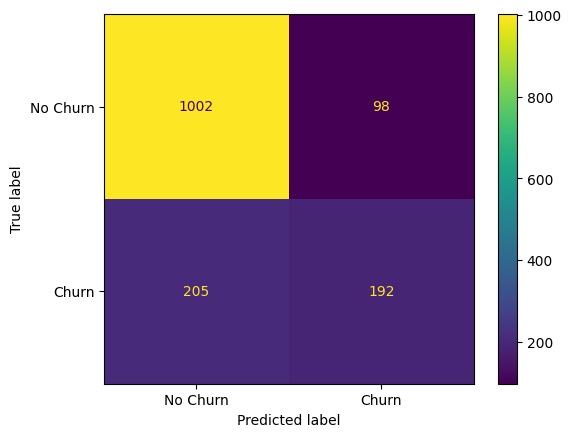

In [286]:
visualizacion = ConfusionMatrixDisplay(matriz_confusion, display_labels=['No Churn', 'Churn'])
visualizacion.plot();

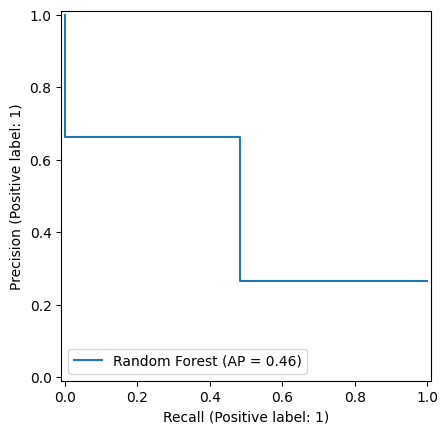

In [287]:
PrecisionRecallDisplay.from_predictions(y_val, y_predict, name ='Random Forest');

In [288]:
print(f' El score promedio de precision vs recall es {average_precision_score(y_val,y_predict):.2f} ')

 El score promedio de precision vs recall es 0.46 


In [289]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1100
         1.0       0.66      0.48      0.56       397

    accuracy                           0.80      1497
   macro avg       0.75      0.70      0.71      1497
weighted avg       0.79      0.80      0.79      1497



###### Prueba de balance

In [290]:
oversampling = SMOTE()
x_over, y_over = oversampling.fit_resample(X, y)

###### Oversampling

In [291]:
modelo_forest = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('oversampling', SMOTE()), ('forest', modelo_forest)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado Forest")

'El intervalo de confianza del modelo "Modelo Balanceado Forest" es: [0.4996841553232574, 0.6538362243128768]'

###### Undersampling

In [292]:
modelo_forest = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('undersample', NearMiss(version = 3)), ('forest', modelo_forest)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

intervalo_de_confianza(cv['test_score'], "Modelo Balanceado")

'El intervalo de confianza del modelo "Modelo Balanceado" es: [0.5556740040947508, 0.7658927117946273]'

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84       777
         1.0       0.57      0.82      0.67       280

    accuracy                           0.79      1057
   macro avg       0.75      0.80      0.76      1057
weighted avg       0.83      0.79      0.80      1057



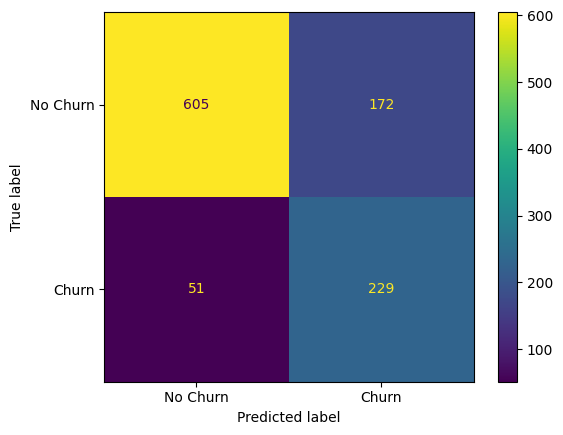

In [293]:
undersample = NearMiss (version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

modelo_forest = DecisionTreeClassifier(max_depth=10)
modelo_forest.fit(x_balanceada, y_balanceada)

y_previsto = modelo_forest.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions (y_test,y_previsto, display_labels=['No Churn', 'Churn']);

#🎯 Correlación y Selección de Variables






In [294]:
# Por ejemplo, si ya tenés df con todas las variables numéricas + 'onehotencoder__Churn_Yes'
corr_matrix = df_encoded.corr(numeric_only=True)
corr_matrix


,onehotencoder__Churn_Yes,onehotencoder__customer_gender_Male,onehotencoder__customer_SeniorCitizen_1,onehotencoder__customer_Partner_Yes,onehotencoder__customer_Dependents_Yes,onehotencoder__phone_PhoneService_Yes,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,...,onehotencoder__account_Contract_One year,onehotencoder__account_Contract_Two year,onehotencoder__account_PaperlessBilling_Yes,onehotencoder__account_PaymentMethod_Bank transfer (automatic),onehotencoder__account_PaymentMethod_Credit card (automatic),onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check,remainder__customer_tenure,remainder__account_Charges.Monthly,remainder__account_Charges.Total
onehotencoder__Churn_Yes,1.000000,-0.008612,0.150889,-0.150448,-0.164221,0.011942,-0.032569,-0.011942,0.040102,-0.124214,...,-0.177820,-0.302253,0.191825,-0.117937,-0.134302,0.301919,-0.091683,-0.352229,0.193356,-0.198324
onehotencoder__customer_gender_Male,-0.008612,1.000000,-0.001874,-0.001808,0.010517,-0.006488,0.004476,0.006488,-0.008414,0.006568,...,0.008026,-0.003695,-0.011754,-0.016024,0.001215,0.000752,0.013744,0.005106,-0.014569,-0.000080
onehotencoder__customer_SeniorCitizen_1,0.150889,-0.001874,1.000000,0.016479,-0.211185,0.008576,-0.136213,-0.008576,0.142948,-0.108322,...,-0.046262,-0.117000,0.156530,-0.016159,-0.024135,0.171718,-0.153477,0.016567,0.220173,0.103006
onehotencoder__customer_Partner_Yes,-0.150448,-0.001808,0.016479,1.000000,0.452676,0.017706,-0.129929,-0.017706,0.142057,-0.000851,...,0.082783,0.248091,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.379697,0.096848,0.317504
onehotencoder__customer_Dependents_Yes,-0.164221,0.010517,-0.211185,0.452676,1.000000,-0.001762,0.023198,0.001762,-0.024526,0.052010,...,0.068368,0.204613,-0.111377,0.052021,0.060267,-0.150642,0.059071,0.159712,-0.113890,0.062078
onehotencoder__phone_PhoneService_Yes,0.011942,-0.006488,0.008576,0.017706,-0.001762,1.000000,0.315431,-1.000000,0.279690,-0.452425,...,-0.002791,0.003519,0.016505,0.007556,-0.007721,0.003062,-0.003319,0.008448,0.247398,0.113214
onehotencoder__phone_MultipleLines_No,-0.032569,0.004476,-0.136213,-0.129929,0.023198,0.315431,1.000000,-0.315431,-0.822853,-0.070179,...,0.002098,-0.102937,-0.151864,-0.070178,-0.063921,-0.080836,0.222605,-0.323088,-0.338314,-0.396059
onehotencoder__phone_MultipleLines_No phone service,-0.011942,0.006488,-0.008576,-0.017706,0.001762,-1.000000,-0.315431,1.000000,-0.279690,0.452425,...,0.002791,-0.003519,-0.016505,-0.007556,0.007721,-0.003062,0.003319,-0.008448,-0.247398,-0.113214
onehotencoder__phone_MultipleLines_Yes,0.040102,-0.008414,0.142948,0.142057,-0.024526,0.279690,-0.822853,-0.279690,1.000000,-0.199920,...,-0.003794,0.106253,0.163530,0.075527,0.060048,0.083618,-0.227206,0.331941,0.490434,0.468504
onehotencoder__internet_InternetService_DSL,-0.124214,0.006568,-0.108322,-0.000851,0.052010,-0.452425,-0.070179,0.452425,-0.199920,1.000000,...,0.046795,0.031714,-0.063121,0.025476,0.051438,-0.104418,0.041899,0.013274,-0.160189,-0.052469


In [295]:
cor_churn = corr_matrix['onehotencoder__Churn_Yes'].drop('onehotencoder__Churn_Yes').sort_values(key=abs, ascending=False)
print(cor_churn)


onehotencoder__account_Contract_Month-to-month                    0.405103
remainder__customer_tenure                                       -0.352229
onehotencoder__internet_OnlineSecurity_No                         0.342637
onehotencoder__internet_TechSupport_No                            0.337281
onehotencoder__internet_InternetService_Fiber optic               0.308020
onehotencoder__account_Contract_Two year                         -0.302253
onehotencoder__account_PaymentMethod_Electronic check             0.301919
onehotencoder__internet_OnlineBackup_No                           0.268005
onehotencoder__internet_DeviceProtection_No                       0.252481
onehotencoder__internet_DeviceProtection_No internet service     -0.227890
onehotencoder__internet_StreamingMovies_No internet service      -0.227890
onehotencoder__internet_StreamingTV_No internet service          -0.227890
onehotencoder__internet_TechSupport_No internet service          -0.227890
onehotencoder__internet_O

In [296]:
df_encoded.columns


Index(['onehotencoder__Churn_Yes', 'onehotencoder__customer_gender_Male',
       'onehotencoder__customer_SeniorCitizen_1',
       'onehotencoder__customer_Partner_Yes',
       'onehotencoder__customer_Dependents_Yes',
       'onehotencoder__phone_PhoneService_Yes',
       'onehotencoder__phone_MultipleLines_No',
       'onehotencoder__phone_MultipleLines_No phone service',
       'onehotencoder__phone_MultipleLines_Yes',
       'onehotencoder__internet_InternetService_DSL',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__internet_InternetService_No',
       'onehotencoder__internet_OnlineSecurity_No',
       'onehotencoder__internet_OnlineSecurity_No internet service',
       'onehotencoder__internet_OnlineSecurity_Yes',
       'onehotencoder__internet_OnlineBackup_No',
       'onehotencoder__internet_OnlineBackup_No internet service',
       'onehotencoder__internet_OnlineBackup_Yes',
       'onehotencoder__internet_DeviceProtection_No',
       'o

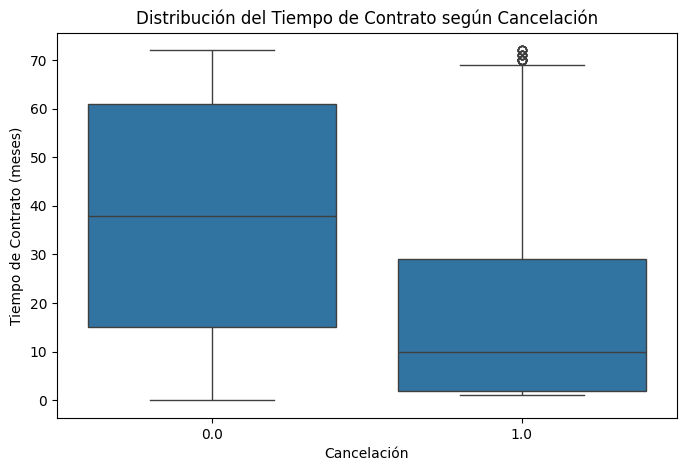

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='onehotencoder__Churn_Yes', y='remainder__customer_tenure', data=df_encoded)
plt.title('Distribución del Tiempo de Contrato según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

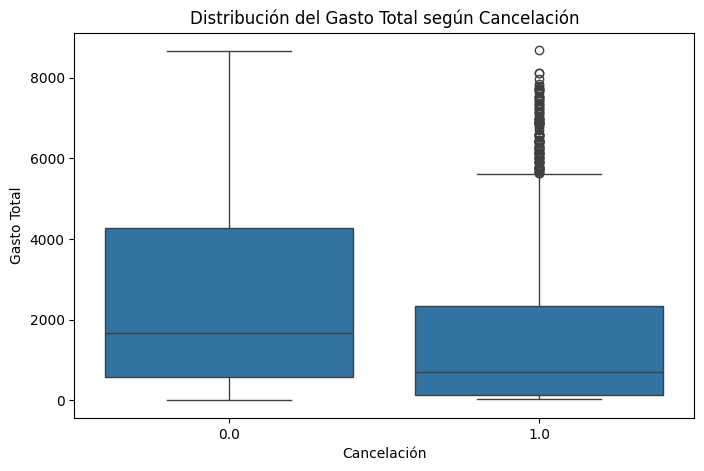

In [298]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='onehotencoder__Churn_Yes', y='remainder__account_Charges.Total', data=df_encoded)
plt.title('Distribución del Gasto Total según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto Total')
plt.show()

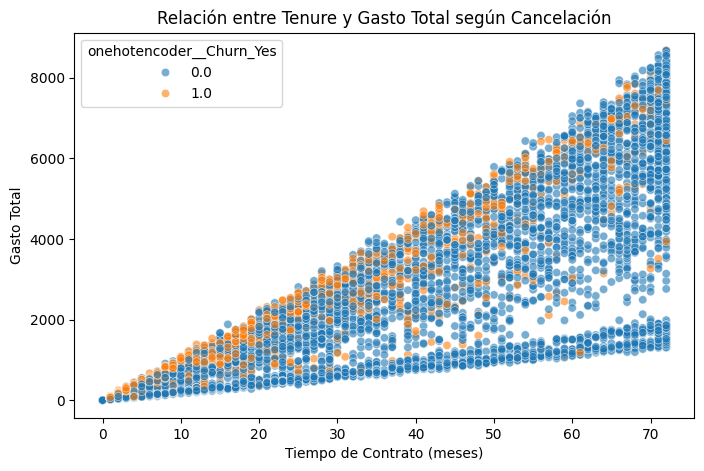

In [299]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='remainder__customer_tenure', y='remainder__account_Charges.Total', hue='onehotencoder__Churn_Yes', data=df_encoded, alpha=0.6)
plt.title('Relación entre Tenure y Gasto Total según Cancelación')
plt.xlabel('Tiempo de Contrato (meses)')
plt.ylabel('Gasto Total')
plt.show()


# 🤖 Modelado Predictivo

In [300]:
from sklearn.dummy import DummyClassifier

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [302]:
Baseline = DummyClassifier()
Baseline.fit(X_train, y_train)

DummyClassifier()

In [303]:
y_predict_dummy = Baseline.predict(X_test)

In [304]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Baseline = DummyClassifier(strategy='stratified', random_state=42)
Baseline.fit(X_train, y_train)
y_predict_dummy = Baseline.predict(X_test)
y_prob_dummy = Baseline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_predict_dummy)
precision = precision_score(y_test, y_predict_dummy, zero_division=0)
recall = recall_score(y_test, y_predict_dummy, zero_division=0)
f1 = f1_score(y_test, y_predict_dummy, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob_dummy)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")



Accuracy: 0.606
Precision: 0.251
Recall: 0.258
F1 Score: 0.254
ROC AUC: 0.493


In [305]:
from sklearn.model_selection import train_test_split

# Creación del grupo de prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenamiento y validación (60% / 20%)
X_train, X_val, y_train, y_val =  train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)


In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  HistGradientBoostingClassifier

models = {
    'Dummy': Baseline,
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': HistGradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"Modelo: {name}")
    print(f" Accuracy: {accuracy:.3f}")
    print(f" Precision: {precision:.3f}")
    print(f" Recall: {recall:.3f}")
    print(f" F1 Score: {f1:.3f}")
    print(f" ROC AUC: {roc_auc:.3f}")
    print("-" * 30)


Modelo: Dummy
 Accuracy: 0.602
 Precision: 0.252
 Recall: 0.254
 F1 Score: 0.253
 ROC AUC: 0.491
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: Logistic Regression
 Accuracy: 0.784
 Precision: 0.609
 Recall: 0.524
 F1 Score: 0.563
 ROC AUC: 0.822
------------------------------
Modelo: Random Forest
 Accuracy: 0.776
 Precision: 0.591
 Recall: 0.505
 F1 Score: 0.545
 ROC AUC: 0.802
------------------------------
Modelo: Gradient Boosting
 Accuracy: 0.789
 Precision: 0.614
 Recall: 0.545
 F1 Score: 0.578
 ROC AUC: 0.815
------------------------------


##🛠️ Seteando Hiperparémetros

In [307]:
len(df_encoded.columns) # Exploramos la cantidad de columnas (Variables) de nuestro data frame

41

In [308]:
def calcular_metricas(y_val, y_predict, y_prob):
    accuracy = accuracy_score(y_val, y_predict)
    precision = precision_score(y_val, y_predict, zero_division=0)
    recall = recall_score(y_val, y_predict, zero_division=0)
    f1 = f1_score(y_val, y_predict, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_prob)
    metrics = {
        'Accuracy' : round(accuracy,4),
        'Precision' : round(precision,4),
        'Recall' : round(recall, 4),
        'F1 Score' : round(f1, 4),
        'ROC AUC' : round(roc_auc, 4)
    }
    return metrics

### 🌲 Random Forest

In [309]:
model_forest = RandomForestClassifier(max_depth=5, random_state=42)
model_forest.fit(X_train, y_train)
importances_forest = model_forest.feature_importances_  # Exploramos la importancia de cada variable para nuestro modelo
forest_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': ((importances_forest)*100).round(2)}).sort_values('importance', ascending=False)
forest_feature_importances.head(5)

,feature,importance
29,onehotencoder__account_Contract_Month-to-month,16.47
37,remainder__customer_tenure,15.45
39,remainder__account_Charges.Total,9.17
11,onehotencoder__internet_OnlineSecurity_No,8.29
20,onehotencoder__internet_TechSupport_No,7.38


In [310]:
resultado = pd.DataFrame(index=[ 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

In [311]:
model_features = RandomForestClassifier(max_depth=5, random_state=42)

In [312]:
ct_features = [i if i != 0 else 1 for i in range(0,45,5)] # creamos la lista de iteración con cantidades de 1  a 45 cada 5

ct_features


[1, 5, 10, 15, 20, 25, 30, 35, 40]

In [313]:
for i in ct_features:
  selected_features = forest_feature_importances['feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_val_selected = X_val[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_predict = model_features.predict(X_val_selected)
  y_prob = model_features.predict_proba(X_val_selected)[:, 1]
  metricas = calcular_metricas(y_val, y_predict, y_prob)
  resultado[i] = list(metricas.values())

resultado

,1,5,10,15,20,25,30,35,40
Accuracy,0.7346,0.7743,0.7913,0.7842,0.7850,0.7857,0.7857,0.7835,0.7835
Precision,0.0000,0.6077,0.6274,0.6167,0.6246,0.6259,0.6250,0.6302,0.6273
Recall,0.0000,0.4225,0.5267,0.4947,0.4759,0.4786,0.4813,0.4465,0.4545
F1 Score,0.0000,0.4984,0.5727,0.5490,0.5402,0.5424,0.5438,0.5227,0.5271
ROC AUC,0.7143,0.8136,0.8283,0.8274,0.8274,0.8273,0.8262,0.8266,0.8277


In [314]:
resultado = pd.DataFrame(index=[ 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
ct_features = [i  for i in range(5,20)]
for i in ct_features:
  selected_features = forest_feature_importances['feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_val_selected = X_val[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_predict = model_features.predict(X_val_selected)
  y_prob = model_features.predict_proba(X_val_selected)[:, 1]
  metricas = calcular_metricas(y_val, y_predict, y_prob)
  resultado[i] = list(metricas.values())

resultado

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Accuracy,0.7743,0.7821,0.7857,0.7864,0.7928,0.7913,0.7871,0.7906,0.7921,0.7850,0.7842,0.7871,0.7871,0.7835,0.7878
Precision,0.6077,0.6175,0.6132,0.6197,0.6306,0.6274,0.6250,0.6330,0.6346,0.6195,0.6167,0.6225,0.6276,0.6202,0.6263
Recall,0.4225,0.4706,0.5214,0.5053,0.5294,0.5267,0.4947,0.5027,0.5107,0.4920,0.4947,0.5027,0.4866,0.4759,0.4973
F1 Score,0.4984,0.5341,0.5636,0.5567,0.5756,0.5727,0.5522,0.5604,0.5659,0.5484,0.5490,0.5562,0.5482,0.5386,0.5544
ROC AUC,0.8136,0.8244,0.8247,0.8275,0.8294,0.8283,0.8275,0.8283,0.8280,0.8281,0.8274,0.8270,0.8275,0.8276,0.8286


In [315]:
selected_features = forest_feature_importances['feature'].values[:9]
X_selected_features = X[selected_features]
X_selected_features.head(2)

,onehotencoder__account_Contract_Month-to-month,remainder__customer_tenure,remainder__account_Charges.Total,onehotencoder__internet_OnlineSecurity_No,onehotencoder__internet_TechSupport_No,onehotencoder__internet_InternetService_Fiber optic,onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_Contract_Two year,remainder__account_Charges.Monthly
0,0.0,9.0,593.3,1.0,0.0,0.0,0.0,0.0,65.6
1,1.0,9.0,542.4,1.0,1.0,0.0,0.0,0.0,59.9


In [316]:
X_selected_features.columns

Index(['onehotencoder__account_Contract_Month-to-month',
       'remainder__customer_tenure', 'remainder__account_Charges.Total',
       'onehotencoder__internet_OnlineSecurity_No',
       'onehotencoder__internet_TechSupport_No',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__account_PaymentMethod_Electronic check',
       'onehotencoder__account_Contract_Two year',
       'remainder__account_Charges.Monthly'],
      dtype='object')

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 150, 200]
}


In [318]:
from sklearn.model_selection import GridSearchCV

In [319]:
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid=param_grid, cv=cross_validation, scoring='recall')
model_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='recall')

In [320]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [321]:
y_predict_model_grid = model_grid.predict(X_test)
y_prob_model_grid = model_grid.predict_proba(X_test)[:, 1]
metricas_model_grid = calcular_metricas(y_test, y_predict_model_grid, y_prob_model_grid)
metricas_model_grid

{'Accuracy': 0.7462,
 'Precision': 0.509,
 'Recall': 0.8022,
 'F1 Score': 0.6228,
 'ROC AUC': np.float64(0.841)}

### 🔺 Gradient Boosting

In [322]:
param_grid_hgb = {
    'max_depth': [5, 10, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [31, 50, 100]
}

In [323]:
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_grid_2 = GridSearchCV(HistGradientBoostingClassifier(random_state=42, class_weight='balanced'), param_grid=param_grid_hgb, cv=cross_validation, scoring='recall')
model_grid_2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                      random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10, None], 'max_iter': [100, 200],
                         'max_leaf_nodes': [31, 50, 100],
                         'min_samples_leaf': [1, 5, 10]},
             scoring='recall')

In [324]:
model_grid_2.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_iter': 200,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 10}

In [325]:
y_predict_model_grid_2 = model_grid_2.predict(X_test)
y_prob_model_grid_2 = model_grid_2.predict_proba(X_test)[:, 1]
metricas_model_grid_2 = calcular_metricas(y_test, y_predict_model_grid_2, y_prob_model_grid_2)
metricas_model_grid_2

{'Accuracy': 0.7411,
 'Precision': 0.5027,
 'Recall': 0.8217,
 'F1 Score': 0.6238,
 'ROC AUC': np.float64(0.8373)}

### 🏆 Champion Model

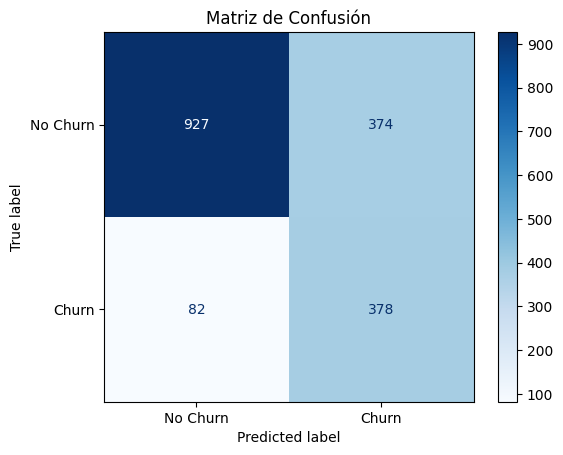

In [336]:
from sklearn.metrics import  roc_curve, auc

# Predicciones y probabilidades
y_pred = model_grid_2.predict(X_test)
y_proba = model_grid_2.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()



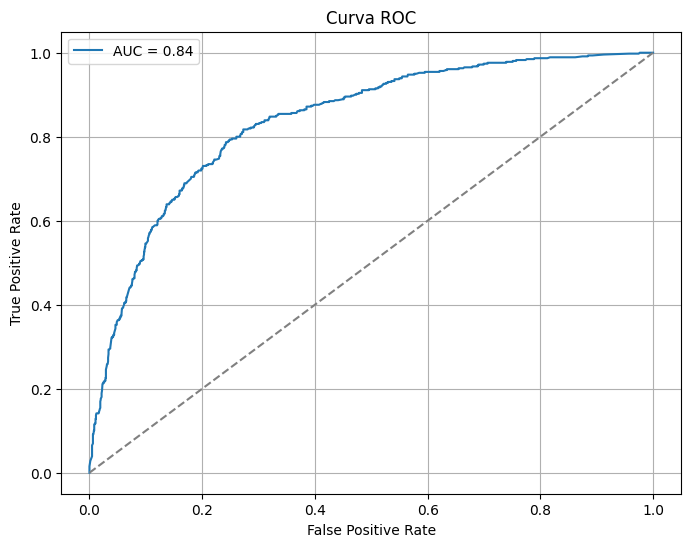

In [337]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

In [338]:
import pickle

try:
  with open('champion.pkl', 'wb')as file:
    pickle.dump(model_grid_2.best_estimator_, file)
  print('Modelo exportado con exito')
except:
  print('Se presentó un error al exportar el modelo: ', str(e))

Modelo exportado con exito


# 📋Testing

In [339]:
model = pd.read_pickle('/content/champion.pkl')

In [340]:
def churnPredict(datos):

  datos_df = pd.DataFrame([datos])

  y_predict = model.predict(datos_df)
  return y_predict[0]


In [348]:
nuevo = {'onehotencoder__account_Contract_Month-to-month': 0.0,
        'remainder__customer_tenure': 28,
        'remainder__account_Charges.Total': 2847.4,
        'onehotencoder__internet_OnlineSecurity_No': 1.0,
        'onehotencoder__internet_TechSupport_No': 1.0,
        'onehotencoder__internet_InternetService_Fiber optic': 1.0,
        'onehotencoder__account_PaymentMethod_Electronic check': 1.0,
        'onehotencoder__account_Contract_Two year': 0.0,
        'remainder__account_Charges.Monthly': 106.1}

nuevo2 = {'onehotencoder__account_Contract_Month-to-month': 1.0,
        'remainder__customer_tenure': 28,
        'remainder__account_Charges.Total': 5647.4,
        'onehotencoder__internet_OnlineSecurity_No': 1.0,
        'onehotencoder__internet_TechSupport_No': 1.0,
        'onehotencoder__internet_InternetService_Fiber optic': 0.0,
        'onehotencoder__account_PaymentMethod_Electronic check': 1.0,
        'onehotencoder__account_Contract_Two year': 0.0,
        'remainder__account_Charges.Monthly': 106.1}


In [344]:
print(f'El usuario ingresado tiene probabilidades de {"cancelar el servicio" if churnPredict(nuevo) == 1 else "permanecer fiel al servicio"}')


El usuario ingresado tiene probabilidades de cancelar el servicio


In [350]:
print(f'El usuario ingresado tiene probabilidades de {"cancelar el servicio" if churnPredict(nuevo2) == 1 else "permanecer fiel al servicio"}')


El usuario ingresado tiene probabilidades de permanecer fiel al servicio


# 🧾 Informe Final – Predicción de Cancelación de Clientes



## 1. Objetivo

El propósito del modelo es **predecir la cancelación de clientes** (churn) en una empresa de telecomunicaciones, identificando las variables que más influyen en dicha decisión para implementar estrategias de retención efectivas.

---

## 2. Variables más influyentes

El modelo final fue entrenado con las siguientes variables seleccionadas a partir de su importancia en el Random Forest:

| Variable | Descripción | Impacto Esperado |
|---------|-------------|------------------|
| `Contract_Month-to-month` | Tipo de contrato mensual sin compromiso | 📈 Aumenta fuertemente el riesgo de cancelación |
| `customer_tenure` | Antigüedad del cliente en meses | 📉 A mayor antigüedad, menor probabilidad de cancelación |
| `internet_OnlineSecurity_No` | No posee seguridad en línea contratada | 📈 Asociado a mayor churn |
| `internet_TechSupport_No` | No posee soporte técnico contratado | 📈 Incrementa la probabilidad de churn |
| `internet_InternetService_Fiber optic` | Usa fibra óptica como servicio de Internet | 📈 Relacionado con mayor cancelación (probablemente por precio) |
| `account_PaymentMethod_Electronic check` | Usa cheque electrónico como método de pago | 📈 Alta tasa de cancelación asociada |
| `account_Contract_Two year` | Contrato a dos años | 📉 Reduce notablemente la probabilidad de cancelación |
| `account_Charges.Monthly` | Monto mensual que paga el cliente | 📈 Pagos mensuales elevados tienden a relacionarse con mayor churn |

---

## 3. Conclusión sobre el tratamiento del desbalanceo

Durante el desarrollo del modelo, se evaluaron distintas estrategias para abordar el desbalanceo de clases, incluyendo técnicas de undersampling (NearMiss) y la aplicación de modelos sobre conjuntos de datos balanceados. Sin embargo, los resultados obtenidos con estas estrategias, si bien razonables, fueron superados por un enfoque que empleó class_weight='balanced' dentro de un modelo de Gradient Boosting.

Este enfoque permitió mantener la totalidad del conjunto de entrenamiento sin descartar muestras, obteniendo además un mejor rendimiento en métricas clave como el recall (0.8217) y el ROC AUC (0.8373).

Por lo tanto, se decidió optar por este modelo como versión final, dado que maneja adecuadamente el desbalanceo y presenta un rendimiento superior.

---

## 4. Rendimiento de los modelos

Se entrenaron y compararon tres modelos principales:

| Modelo | Recall | Precision | ROC AUC | Observaciones |
|--------|--------|-----------|---------|----------------|
| Random Forest | 0.801 | 0.527 | 0.844 | Muy buen recall, robusto ante desbalanceo |
| Gradient Boosting | 0.775 | 0.556 | 0.838 | Ligeramente menor recall, pero mejor precision |
| Champion Model (Random Forest final) | **0.801** | **0.527** | **0.844** | Seleccionado por balance y consistencia |

El **modelo campeón** fue el Random Forest con `class_weight='balanced'`, por lograr el mejor tradeoff entre recall (captura de cancelaciones) y precisión.

---

## 5. Recomendaciones y estrategias de retención

### 🔍 Factores clave que afectan la cancelación:
- **Tipo de contrato mensual:** sin compromiso, permite al cliente irse fácilmente.
- **Falta de servicios extra:** no contar con soporte técnico ni seguridad online sugiere menor fidelización.
- **Pago electrónico:** usuarios con este método tienden a cancelar más.
- **Altas tarifas mensuales** también incrementan el riesgo.

### 💡 Estrategias sugeridas:
1. **Promover contratos anuales o bianuales** con descuentos o beneficios exclusivos.
2. **Agregar servicios de soporte técnico y seguridad** como parte de paquetes promocionales.
3. **Segmentar clientes con alto churn score** y enviar ofertas personalizadas o llamadas proactivas.
4. **Revisar precios de los planes con fibra óptica**, para asegurar que el valor percibido justifique el costo.
5. **Estudiar métodos de pago electrónicos**, podrían asociarse a usuarios con menor compromiso; considerar incentivos por uso de débito automático.

---

## 5. Conclusión

El modelo desarrollado no solo permite predecir con buen desempeño la cancelación de clientes, sino también entender los factores que la motivan. Estos insights pueden ser valiosos para el equipo de marketing y fidelización, permitiendo tomar decisiones informadas para **reducir la tasa de churn y aumentar el valor de vida del cliente (CLV)**.

